In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
import os
import tensorflow as tf

2024-08-10 02:46:14.456831: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
bitcoin_data = pd.read_csv('/Users/karina/Documents/NCI Cryptocurrencies Project/Data CSV Cryptocurrencies/Bitcoin_data.csv', na_values='n/a', parse_dates =['Date'])
bitcoin_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2024-07-09,"$56,704.60","$58,239.20","$56,316.88","$58,009.23","$27,849,512,607","$1,143,927,440,649"
1,2024-07-08,"$55,849.57","$58,131.34","$54,321.02","$56,705.10","$39,766,159,899","$1,118,206,962,401"
2,2024-07-07,"$58,239.43","$58,371.12","$55,793.33","$55,849.11","$20,553,359,505","$1,101,324,021,019"
3,2024-07-06,"$56,659.08","$58,472.55","$56,038.96","$58,303.54","$20,610,320,577","$1,149,721,701,454"
4,2024-07-05,"$57,022.81","$57,497.15","$53,717.38","$56,662.37","$55,417,544,033","$1,117,355,596,307"


In [4]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4091 entries, 0 to 4090
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4091 non-null   datetime64[ns]
 1   Open        4091 non-null   object        
 2   High        4091 non-null   object        
 3   Low         4091 non-null   object        
 4   Close       4091 non-null   object        
 5   Volume      4091 non-null   object        
 6   Market Cap  4091 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 223.9+ KB


## Removing the non-numeric characters from the columns

In [5]:
bitcoin_data['Open'] = bitcoin_data['Open'].str.replace('[^\d\.]', '', regex=True)
bitcoin_data['High'] = bitcoin_data['High'].str.replace('[^\d\.]', '', regex=True)
bitcoin_data['Low'] = bitcoin_data['Low'].str.replace('[^\d\.]', '', regex=True)
bitcoin_data['Close'] = bitcoin_data['Close'].str.replace('[^\d\.]', '', regex=True)
bitcoin_data['Volume'] = bitcoin_data['Volume'].str.replace('[^\d\.]', '', regex=True)
bitcoin_data['Market Cap'] = bitcoin_data['Market Cap'].str.replace('[^\d\.]', '', regex=True)

In [6]:
#change the data type to float
bitcoin_data[['Open', 'High','Low','Close','Volume','Market Cap']] = bitcoin_data[['Open', 'High','Low','Close','Volume','Market Cap']].astype(float)

In [7]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4091 entries, 0 to 4090
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4091 non-null   datetime64[ns]
 1   Open        4091 non-null   float64       
 2   High        4091 non-null   float64       
 3   Low         4091 non-null   float64       
 4   Close       4091 non-null   float64       
 5   Volume      4091 non-null   float64       
 6   Market Cap  4091 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 223.9 KB


In [8]:
bitcoin_data

,Date,Open,High,Low,Close,Volume,Market Cap
0,2024-07-09,56704.60,58239.20,56316.88,58009.23,2.784951e+10,1.143927e+12
1,2024-07-08,55849.57,58131.34,54321.02,56705.10,3.976616e+10,1.118207e+12
2,2024-07-07,58239.43,58371.12,55793.33,55849.11,2.055336e+10,1.101324e+12
3,2024-07-06,56659.08,58472.55,56038.96,58303.54,2.061032e+10,1.149722e+12
4,2024-07-05,57022.81,57497.15,53717.38,56662.37,5.541754e+10,1.117356e+12
...,...,...,...,...,...,...,...
4086,2013-05-02,116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09
4087,2013-05-01,139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09
4088,2013-04-30,144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09
4089,2013-04-29,134.44,147.49,134.00,144.54,0.000000e+00,1.603769e+09


In [9]:
#Indexing the Date
bitcoin_data.set_index('Date', inplace=True)
bitcoin_data.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2024-07-09,56704.60,58239.20,56316.88,58009.23,2.784951e+10,1.143927e+12
2024-07-08,55849.57,58131.34,54321.02,56705.10,3.976616e+10,1.118207e+12
2024-07-07,58239.43,58371.12,55793.33,55849.11,2.055336e+10,1.101324e+12
2024-07-06,56659.08,58472.55,56038.96,58303.54,2.061032e+10,1.149722e+12
2024-07-05,57022.81,57497.15,53717.38,56662.37,5.541754e+10,1.117356e+12


In [10]:
#Sorting the data
bitcoin_data = bitcoin_data.sort_values(by="Date", ascending=True)
bitcoin_data.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,0.0,1.488567e+09
2013-04-29,134.44,147.49,134.00,144.54,0.0,1.603769e+09
2013-04-30,144.00,146.93,134.05,139.00,0.0,1.542813e+09
2013-05-01,139.00,139.89,107.72,116.99,0.0,1.298955e+09
2013-05-02,116.38,125.60,92.28,105.21,0.0,1.168517e+09


In [11]:

# Ensure that the 'Date' column is in datetime format
bitcoin_data.index = pd.to_datetime(bitcoin_data.index)

# Filter rows between the specified dates
df = bitcoin_data['2017-08-01':'2024-07-09']

# Display the first few rows to confirm filtering
print(df.head())
print(df.tail())


               Open     High      Low    Close        Volume    Market Cap
Date                                                                      
2017-08-01  2871.30  2921.35  2685.61  2718.26  1.324670e+09  4.480460e+10
2017-08-02  2727.13  2762.53  2668.59  2710.67  1.094950e+09  4.468465e+10
2017-08-03  2709.56  2813.31  2685.14  2804.73  8.047970e+08  4.623997e+10
2017-08-04  2806.93  2899.33  2743.72  2895.89  1.002120e+09  4.774946e+10
2017-08-05  2897.63  3290.01  2874.83  3252.91  1.945700e+09  5.364345e+10
                Open      High       Low     Close        Volume    Market Cap
Date                                                                          
2024-07-05  57022.81  57497.15  53717.38  56662.37  5.541754e+10  1.117356e+12
2024-07-06  56659.08  58472.55  56038.96  58303.54  2.061032e+10  1.149722e+12
2024-07-07  58239.43  58371.12  55793.33  55849.11  2.055336e+10  1.101324e+12
2024-07-08  55849.57  58131.34  54321.02  56705.10  3.976616e+10  1.118207e+12
2

In [12]:
#converting Close column in a numpy array
ex = df['Close'].values
type(ex)

numpy.ndarray

Neural Networks works with numpy arrays and Tensors that are multidimentional arrays

In [13]:
ex = df['Close'].values
ex.shape

(2535,)

In [14]:
#reshape the numpy array
df = df['Close'].values
df = df.reshape(-1,1)
print(df.shape)
df[:7]

(2535, 1)


array([[2718.26],
       [2710.67],
       [2804.73],
       [2895.89],
       [3252.91],
       [3213.94],
       [3378.94]])

Now I will split the dataset in the train dataset and test dataset. I will train the data in the train dataset and i will use the test dataset for validation. To see how good the network predict the prices.

In [15]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)- 50:])

In [16]:
dataset_train.shape

(2028, 1)

In [17]:
dataset_test.shape

(557, 1)

Sometimes, especially if we have several columns or one column, we want to scale the data just to make sure that the network works correctly and learns correctly.That's why it's best practice.
I would actually always recommend when use neural networks to scale the data. 

In [18]:
scaler = MinMaxScaler(feature_range= (0,1))
dataset_train = scaler.fit_transform (dataset_train)
dataset_train[:7]
#Fitting simply means that actually the scalar itself takes a look at the dataset at first. So here in this second step, transform the scalar now transforms the data from the 67 and so on into a range between zero and one.

array([[0.00011703],
       [0.        ],
       [0.00145029],
       [0.00285586],
       [0.00836066],
       [0.00775979],
       [0.01030388]])

In [19]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:7]

array([[0.21334643],
       [0.21454261],
       [0.21552001],
       [0.21538725],
       [0.21821474],
       [0.21780614],
       [0.21958284]])

In [20]:
def create_my_dataset(df):
    x = []
    y = []
    for i in range(50,df.shape[0]):
        x.append (df[i-50:i,0])
        y.append (df[i,0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [21]:
x_train,y_train = create_my_dataset(dataset_train)
x_train[:1]

array([[0.00011703, 0.        , 0.00145029, 0.00285586, 0.00836066,
        0.00775979, 0.01030388, 0.01093605, 0.00974156, 0.01033996,
        0.01449284, 0.01810221, 0.02100942, 0.02489293, 0.02268497,
        0.025687  , 0.02499408, 0.0223564 , 0.02286645, 0.02123145,
        0.01990667, 0.02142973, 0.02221609, 0.02504018, 0.02560944,
        0.0253134 , 0.02578336, 0.02577997, 0.0288076 , 0.02859605,
        0.03072522, 0.03363351, 0.02880374, 0.02886834, 0.02352344,
        0.02568546, 0.02908667, 0.02912923, 0.02340687, 0.0233654 ,
        0.02177542, 0.02236642, 0.02189676, 0.01806952, 0.00685024,
        0.01429086, 0.01409843, 0.01344838, 0.02088514, 0.01872297]])

In [22]:
x_train[:1].shape

(1, 50)

It's a Numpy array with 50 entries, which means I have the first 50 prices and the Y Train.

In [23]:
x_test,y_test = create_my_dataset(dataset_test)
x_test[:1]
#i do the same with the test set

array([[0.21334643, 0.21454261, 0.21552001, 0.21538725, 0.21821474,
        0.21780614, 0.21958284, 0.2196308 , 0.22172867, 0.22335396,
        0.22720463, 0.23487715, 0.24915012, 0.2651853 , 0.28163292,
        0.28016044, 0.28461383, 0.28448878, 0.27719973, 0.28333654,
        0.30784863, 0.30940716, 0.30852505, 0.31182481, 0.30723065,
        0.31465307, 0.31334125, 0.31404974, 0.31331519, 0.32477871,
        0.31037098, 0.31498334, 0.32399544, 0.32011146, 0.31976377,
        0.31795253, 0.31215231, 0.30913702, 0.31691084, 0.31190144,
        0.29462691, 0.29203872, 0.29542606, 0.2941514 , 0.29445823,
        0.30082154, 0.33300106, 0.32244894, 0.33697539, 0.33814228]])

In [24]:
x_train.shape

(1978, 50)

1978 entries, 50 times steps. so 50 prices for 50 days.

In [25]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1)) 
print(x_train.shape)
print(x_test.shape)

(1978, 50, 1)
(507, 50, 1)


I finish the preprocessing step and now in the next step, I can actually build the network and then I can also start training the network.

In [26]:
#Create the model
model = Sequential()
model.add(LSTM(units= 96,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

2024-08-10 02:46:31.160150: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 96)                74112     
                                                                 
 dropout_2 (Dropout)         (None, 96)                0         
                                                                 
 dense (Dense)               (None, 1)                 9

In [28]:
model.compile(loss = 'mean_squared_error', optimizer='adam')

In [29]:
#save the model
if (not os.path.exists("/Users/karina/Documents/NCI Cryptocurrencies Project/Prices_Prediction1.h5")):
    model.fit(x_train, y_train, epochs=50, batch_size = 32)
    model.save("/Users/karina/Documents/NCI Cryptocurrencies Project/Prices_Prediction1.h5")

Epoch 1/50
62/62 [==============================] - 32s 268ms/step - loss: 0.0094
Epoch 2/50
62/62 [==============================] - 16s 257ms/step - loss: 0.0026
Epoch 3/50
62/62 [==============================] - 16s 258ms/step - loss: 0.0028
Epoch 4/50
62/62 [==============================] - 14s 226ms/step - loss: 0.0024
Epoch 5/50
62/62 [==============================] - 17s 282ms/step - loss: 0.0020
Epoch 6/50
62/62 [==============================] - 19s 300ms/step - loss: 0.0021
Epoch 7/50
62/62 [==============================] - 15s 242ms/step - loss: 0.0019
Epoch 8/50
62/62 [==============================] - 14s 224ms/step - loss: 0.0018
Epoch 9/50
62/62 [==============================] - 26s 420ms/step - loss: 0.0017
Epoch 10/50
62/62 [==============================] - 25s 408ms/step - loss: 0.0015
Epoch 11/50
62/62 [==============================] - 22s 354ms/step - loss: 0.0015
Epoch 12/50
62/62 [==============================] - 23s 373ms/step - loss: 0.0013
Epoch 13/50
6

In [30]:
model = load_model("/Users/karina/Documents/NCI Cryptocurrencies Project/Prices_Prediction.h5")

In [31]:
predictions = model.predict(x_test)
predictions

16/16 [==============================] - 12s 182ms/step


array([[0.34832212],
       [0.3492244 ],
       [0.3500216 ],
       [0.34910873],
       [0.34632796],
       [0.34240836],
       [0.33545542],
       [0.3291823 ],
       [0.32772118],
       [0.3290914 ],
       [0.32894003],
       [0.3302367 ],
       [0.3311585 ],
       [0.32554692],
       [0.31822062],
       [0.31356362],
       [0.31210682],
       [0.31146693],
       [0.3084575 ],
       [0.2980715 ],
       [0.28630877],
       [0.2806192 ],
       [0.28818154],
       [0.31087726],
       [0.33587444],
       [0.34954205],
       [0.355841  ],
       [0.3705486 ],
       [0.38312286],
       [0.3952567 ],
       [0.4015337 ],
       [0.40498865],
       [0.40156084],
       [0.40201646],
       [0.4003541 ],
       [0.39783782],
       [0.3987761 ],
       [0.39645106],
       [0.39359644],
       [0.39785096],
       [0.4025604 ],
       [0.40752256],
       [0.41032898],
       [0.409794  ],
       [0.40569404],
       [0.4037726 ],
       [0.4041316 ],
       [0.404

In [32]:
predictions = scaler.inverse_transform(predictions)
predictions

array([[25301.506],
       [25360.023],
       [25411.727],
       [25352.521],
       [25172.172],
       [24917.96 ],
       [24467.02 ],
       [24060.17 ],
       [23965.406],
       [24054.275],
       [24044.457],
       [24128.555],
       [24188.338],
       [23824.393],
       [23349.236],
       [23047.201],
       [22952.719],
       [22911.219],
       [22716.04 ],
       [22042.443],
       [21279.557],
       [20910.555],
       [21401.018],
       [22872.975],
       [24494.197],
       [25380.625],
       [25789.152],
       [26743.03 ],
       [27558.547],
       [28345.502],
       [28752.604],
       [28976.678],
       [28754.365],
       [28783.914],
       [28676.1  ],
       [28512.902],
       [28573.758],
       [28422.963],
       [28237.824],
       [28513.756],
       [28819.193],
       [29141.018],
       [29323.033],
       [29288.336],
       [29022.428],
       [28897.81 ],
       [28921.094],
       [28949.357],
       [28909.436],
       [28855.248],


range(2028, 2535)


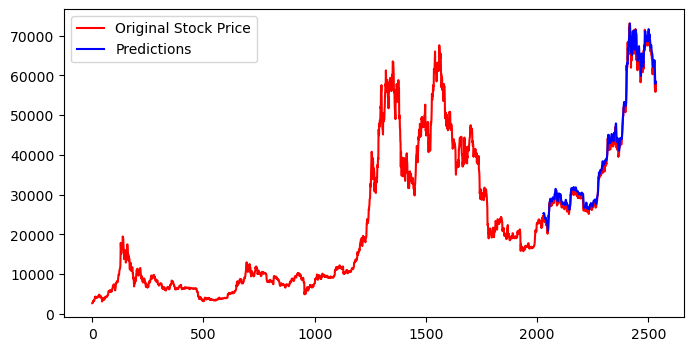

In [33]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(df, color='red', label='Original Stock Price')
ax.plot(range(len(y_train) + 50, len(y_train) + 50 + len(predictions)), predictions, color='blue', label='Predictions')
plt.legend()
print(range(len(y_train) + 50, len(y_train) + 50 + len(predictions)))


So starting from 2028 data, they off the entry until the end. So the Red Line is the original prices and the blue line here is actually what the model predicted

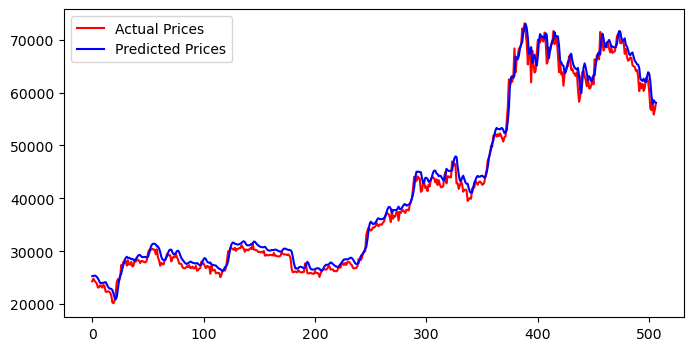

In [34]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(y_test_scaled, color='red', label='Actual Prices')
plt.plot(predictions, color='blue', label='Predicted Prices')
plt.legend()

In [36]:
print ( "MSE: 8.6354e-04")
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2 = r2_score(y_test_scaled, predictions)
print("R-squared (R2):", r2)

MSE: 8.6354e-04
R-squared (R2): 0.9912261926675752
